# Getting started with Excimontec
This jupyter notebook will give a brief introduction to running Lattice Simulations of Organic Photovoltaics using Excimontec.

# Installation Instructions 
From the command line run \
\
```git clone --recurse-submodules https://github.com/bennm37/Excimontec.git```\
\
This will install my fork of Excimontec and the submodule, KMC_Lattice which it is based on. Presuambly this step is completed if you're reading this document.
## Building and testing Excimontec
When first using Excimontec on your computer, you should build and run the test suite to make sure
everything is working correctly. Set the Excimontec directory as the current working directory,\
\
```cd Excimontec```\
\
and then use GNU Make to build the test executable.\
\
```make test```\
\
Once the build is complete, run the test suite\
\
```./test/Excimontec_tests.exe```\
\
If there are no test errors, build the main executable.\
\
```make```\
\
If everything builds correctly, you can run a simple test using the default parameters.\
\
```mpiexec -n 4 Excimontec.exe parameters_default.txt```\
\
This will execute a simple exciton diffusion simulation test, and when it finishes several output files
will be created in the project directory. You can quickly check the results in the analysis summary file
with the command\
\
```cat analysis_summary.txt```\
\
The default parameters should produce an exciton diffusion length of approximately 24 nm.

## Building and testing the Python Interface
From Excimontec, navigate into the interface folder\
\
```cd interface```\
\
Befor installing we need to tell the python inteface where the Excimontec folder is. Open interface/exm/inter.py and change the ```EXMPATH``` variable to the full path of the Excimontec folder on your device. For me this is "/Users/benn-m/Documents/Code/Solar_Software/developing_Exm/Excimontec".\
Use pip to install wheel. You may need to use `python3 -m pip` instead of `pip`. To install for a specific version ```python3.X``` use ```python3.X pip install```. \
\
```pip install wheel```\
\
Then pip install the exm module using\
\
```pip install .```\
\
This should install the module so that we can import it from anywhere. Try running the cell with ```import exm```. \
\
Alternatively, run the cells below to install the python module from this notebook!

## Trouble Shooting
If  ``` pip install .``` runs, but ```import exm``` returns ```ModuleNotFoundError```, the most likely problem is that your machine has multiple different versions of python, and has installed it in one and is running this notebook in another. Try switching the interpreter with which you're running this notebook. 

In [1]:
# Should end with /tutorials. If not use %cd to navigate
%pwd

'/Users/benn-m/Documents/Code/Solar_Software/developing_Exm/Excimontec/tutorials'

In [3]:
# Navigates to interface folder and builds the module, then navigates back to tutorials
%cd ..
%cd interface
!pip install wheel
!pip install .
%cd ..
%cd tutorials



/Users/benn-m/Documents/Code/Solar_Software/developing_Exm/Excimontec
/Users/benn-m/Documents/Code/Solar_Software/developing_Exm/Excimontec/interface
Processing /Users/benn-m/Documents/Code/Solar_Software/developing_Exm/Excimontec/interface
  Preparing metadata (setup.py) ... done
  Created wheel for exm: filename=exm-0.1-py3-none-any.whl size=5517 sha256=4d94bf23be624d86ad69f088e86141f9eff147d61f1a5ef167b9f880f7c99d8b
  Stored in directory: /private/var/folders/f4/ff3z4kt9185_9m1nt9spmzr00000gn/T/pip-ephem-wheel-cache-x2ogq13a/wheels/61/d4/e4/f09d593b93ae238ebae440fc153d4f897c9eff70b43bb70537
Successfully built exm
  Attempting uninstall: exm
    Found existing installation: exm 0.1
    Uninstalling exm-0.1:
      Successfully uninstalled exm-0.1
/Users/benn-m/Documents/Code/Solar_Software/developing_Exm/Excimontec
/Users/benn-m/Documents/Code/Solar_Software/developing_Exm/Excimontec/tutorials


In [1]:
# Testing
import exm 

## Running the Default Parameters with Python
Below is a simple example of how to run the default parameters using the python interface. If it says FileNotFoundError, try restarting the kernel which should reset the current working directory to the one this notebook is in.

In [1]:
from exm.inter import *

project_name = "data/first_project" # The name of the parent folder
folder_names = ["test_0"] # The name of each subfolder
parameter_dicts = [{}] # This will allow for easy paramter sweeps, empty dictionary is default
p = Project(project_name,folder_names,parameter_dicts,overwrite=True) # should print 'Found Default'
p.run(cores=1) # Gives detailed running information, should end with '0: Simulation finished.'

Found Default
args='mpiexec -n 1 /Users/benn-m/Documents/Code/Solar_Software/developing_Exm/Excimontec/Excimontec.exe ./parameters1.txt'
Loading input parameters from file... 
Parameter loading complete!
Initializing MPI options... 0: MPI initialization complete!
0: Creating output files...
0: Initializing simulation 0...
0: Simulation initialization complete
0: Starting exciton diffusion test...
0: Simulation finished.


## Checking the results
Go to data/first_project_0 and check out analysis_summary.txt. This should include several summary statistics like the exciton diffussion lenght and mobility. With the default parameters we expect an Exction Diffussion Length of around 24nm although the variance when running with one core will be high. Annoyingly Jupyter seems to be configured to only run on one core, so to make full use of the capabilities of the program you should run from a python script.


In [2]:
az = Analyzer(project_name,parameter_dicts,folder_names)
edl_0,err_0 = az.exciton_diffusion_length(az.summaries['test_0'])
print(f'The Exciton Diffusion Length was {edl_0} +- {err_0} nm.')

The Exciton Diffusion Length was 29.8578 +- 70.4253 nm.


## Running A Parameter Sweep
This python interface makes it easy run simulations whilst changing a single parameter from a default set of parameters (which we can define ourselves). See the example below. Although the code is the same, as mentioned before Jupyter treats parallel processing calls weirdly so I recommend running this from edl_script.py 


In [3]:
project_name = "data/exciton_diffusion_parameter_sweep"
sigmas = np.round(np.linspace(0.04,0.10,6),2)
print(sigmas)
folder_names = [f'sigma_{val}' for val in sigmas]
default_parameter_file = './exciton_diffusion_default.txt'
parameter_dicts = [{'Energy_stdev_donor':val,'Energy_stdev_acceptor':val} for val in sigmas]
p = Project(project_name,folder_names,parameter_dicts,default_name=default_parameter_file)
# p.run(cores =4)

[0.04 0.05 0.06 0.08 0.09 0.1 ]
Found Default
Leaving Data Alone.


FileExistsError: 

## Plotting and Analyzing the Results
We can recreate a plot from the user manual by plotting the values of the exciton diffusion length against the standard deviation of the density of states. A similar thing could be done for mobility and temperature dependence with a different type of test.

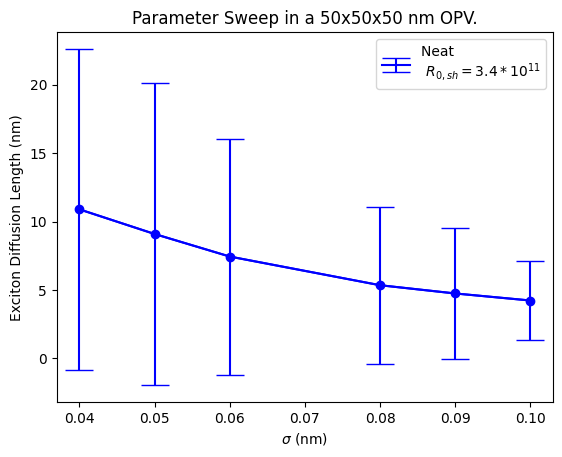

In [9]:
az = Analyzer(project_name,parameter_dicts,folder_names)
fig,ax = plt.subplots()
ax.set(xlabel='$\sigma$ (nm)',ylabel = 'Exciton Diffusion Length (nm)',title = 'Parameter Sweep in a 50x50x50 nm OPV.')
az.plot_edl(ax) # This function extracts the Exciton Diffusion Length and Error from each summary and plots them using matplotlib